# Graphing Laplacian and its Eigenvalues
## Definition

Given a graph $G=(V,E)$ of $|V|=n$ nodes with adjacency matrix $A$, and let $\deg(v)$ be the degree of a vertex $v$. The degree matrix $D$ for $G$ is a $n\times n$ diagonal matrix where $D_{i,j}=\deg(v_i)$ if $i=j$, and 0 otherwise. The Laplacian matrix of $G$ is defined as $L=D-A$, commonly used in spectral graph theory. We will explore one of its interesting properties in this section.

## Networkx

Given a networkx graph object, the library has functions to get the Laplacian matrix or the eigenvalues of the matrix.

In [ ]:
import networkx as nx
import numpy as np

In the next cell, we do the following:

1. Initialize a graph that contains one triangle. 

2. Then add a disjoint triangle into the graph and report the eigenvalues of the new graph laplacian matrix. The output array from the previous cell may contains small float value very close to 0, but not exactly 0 (which one of the eigenvalues should be). Therefore, we round all eigenvalues to 2 decimals using np.around function.

3. We repeat step 2 for 4 times.

## Observation
I observe that there is one 0 eigen value in the matrix representing the graph of one triangle. Now, I believe that every disjoint triangle you add will add an additonal 0 eigen value. I believe this has to do with each disjoint triangle having a rank of 2. 

In [6]:
GraphEX = nx.Graph()
#1 triangle
GraphEX.add_edges_from([[1,2],[2,3],[1,3]])
nx.laplacian_matrix(GraphEX).todense()
print ("1", np.around(nx.laplacian_spectrum(GraphEX)))
#2 triangles
GraphEX.add_edges_from([[4,5],[5,6],[4,6]])
nx.laplacian_matrix(GraphEX).todense()
print("2", np.around(nx.laplacian_spectrum(GraphEX)))
#3 triangles
GraphEX.add_edges_from([[7,8],[8,9],[7,9]])
nx.laplacian_matrix(GraphEX).todense()
print("3",np.around(nx.laplacian_spectrum(GraphEX)))
# 4 triangles
GraphEX.add_edges_from([[10,11],[11,12],[10,12]])
nx.laplacian_matrix(GraphEX).todense()
print("4",np.around(nx.laplacian_spectrum(GraphEX)))
#5 triangles
GraphEX.add_edges_from([[13,14],[14,15],[13,15]])
nx.laplacian_matrix(GraphEX).todense()
print("5",np.around(nx.laplacian_spectrum(GraphEX)))
print("My results confirm my hypothesis.")

1 [-0.  3.  3.]
2 [-0. -0.  3.  3.  3.  3.]
3 [-0. -0. -0.  3.  3.  3.  3.  3.  3.]
4 [-0. -0. -0. -0.  3.  3.  3.  3.  3.  3.  3.  3.]
5 [-0. -0. -0. -0. -0.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
My results confirm my hypothesis.


# Eigenfaces 

## Problem Statement

In this exercise we will be using SVD to create a dictionary of eigenfaces from a training set that will be used to reconstruct faces from a testing set. 

## Data set description:

The data set we use contains images of 38 different people's faces. Each person has 64 or less images taken of their face. Each image is taken under unique lightning conditions. The "nfaces" variable loaded in and described below details how many images are associated with each participant. There are a total of 2410 images in this data set.

All images of the same participant are grouped to be in order adjacent columns in the data matrix. For instance, the first participant has 64 associated images (given in the variable n_faces), and their images are found in the first 64 columns (index 0 to 63) of the matrix. The second participant has 62 associated images, and their images are found in the next 62 columns of the matrix (index 64 to 125) and so forth.

**Our training set will comprise of all images related to the first 36 people, and our testing set will be all images of the last 2 people**

The data is stored in a matlab data file (.mat). We can think of the .mat file as a large dictionary where each key in the .mat dictionary points to some relevant information about the data. 
1. m_prime = int - number of pixel rows per image
2. n_prime = int - number of pixel columns per image
3. nfaces = List - each index, i, represents the number of photos provided for participant i
4. faces = 2D numpy array ((m*n) x 2410) in shape. each column is the "flattened" image of a participants face (all 38 people)
5. trainingFaces = 2D numpy array which represents all images of the first 36 participants
6. testingFaces = 2D numpy array which represents all images of the last 2 participants

Each column in the matrices faces, trainingFaces, and testingFaces, is a "flattened" image of one of the participants.

### Flattening and reshaping an image

When dealing with images, it is common practice to "flatten" each image from a 2D array of (m' x n') dimensions, to a 1D array of dimensions $m'*n' \times 1$ column vector. 

To flatten a 2D image to a 1D vector, we simply call the function: "flattened = nd_array.flatten()"

To reshape a flatten image to its original shape ($m' \times n'$) we call the following function: "original_shape_image = np.reshape(flattened, ($m'$, $n'$))" where "flattened" is the 1D flattened image

## Single Value Decomposition (SVD)

SVD factors can factor a real valued matrix, $A$, into the form $A = U \Lambda V^T$ where
1. $A$ is a real matrix of dimensions $n \times m$
2. $U$ is a real matrix of dimensions $n \times r$
3. $\Lambda$ is a real matrix of dimensions $r \times r$
4. $V$ is a real matrix of dimensions $m \times r$

## Eigenfaces (U)
Notice that if our original matrix, A, is a $n \times m$ matrix, then one of our decomposition matrices from SVD, $U$, has a dimension $n \times r$. Recall that we can reshape a $n$ dimensional column of our original matrix into an image of a face. As it tursn out, we can also reshape a $n$ dimensional column of $U$ into an image of a face as well.

To be more precise, we call each column of $U$ an **eigenface**. Our collection of eigenfaces or a subset of our collection, organized as a matrix, can be used to reconstruct images of faces as a linear combination of our set set of eigenfaces. Of particular interest are images that did not contribute to the SVD (images from our testing set). 

### Using Eigenfaces to reconstruct new faces
Let us define $U_p$ to be an $n \times p$ matrix that is the first $p$ columns of $U$ from the SVD of our mean-centered training set, and let us define $x$ to be an $n$ dimensional vector that is the mean centered flattened image of an image from our testing set. 

**Use the average face of the training data to also mean-center your testing image.**

Consider the following matrix multiplication $$\alpha = (U_p^T) x$$

Our resulting vector, $\alpha$ will be of dimensions $p \times 1$. Each index of $\alpha$, $i$, holds a value that represents the amount of eigenface $i$ that is needed to reconstruct $x$. In particular $$\hat{x} = \sum_{i=1}^p \alpha_i * (U_p)_i$$ in vector form: $$\hat{x} = U_p \alpha$$

Where $\hat{x}$ is our reconstruction of the original image $x$. We clearly see that $\hat{x}$ is simply a linear combination of columns from our matrix, $U$. 

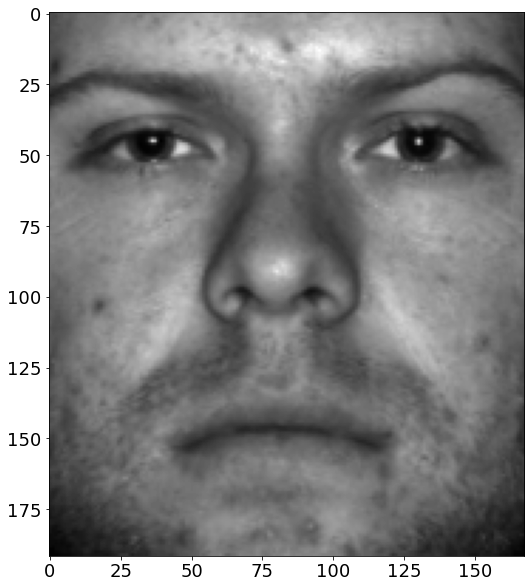

In [7]:
#import cell and data loading
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

#set as global variables that can balled in any function
mat_contents = scipy.io.loadmat(os.path.join('.','DATA','allFaces.mat'))

#common variables
faces = mat_contents['faces'] #data, where each column is a flattened image
m_prime = int(mat_contents['m']) #number of pixel rows in each image
n_prime = int(mat_contents['n']) #number of pixel cols in each image
nfaces = np.ndarray.flatten(mat_contents['nfaces']) #list of how many images per participant
trainingFaces = faces[:,:np.sum(nfaces[:36])]
testingFaces = faces[:,:np.sum(nfaces[36:])]

#example of how to display an image in gray scale
img = plt.imshow(np.reshape(trainingFaces[:,0],(m_prime,n_prime)).T)
img.set_cmap('gray')


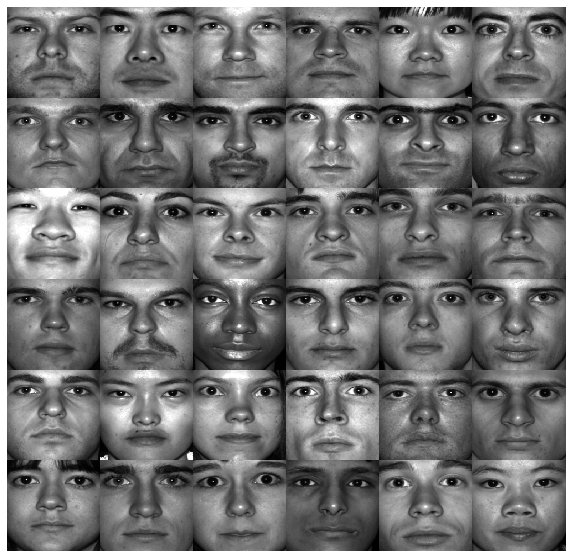

In [8]:
def display_all_participants():
    '''
    Input: None (remember that you have access to the global variables from the import cell)
    Output: None
    
    Create a single image that contains one photo from each of the 36 training participants 
    organized as a 6 x 6 matrix of images
    '''
    fig, axes = plt.subplots(nrows=6, ncols=6)
    plt.subplots_adjust(wspace=0, hspace=0)
    axes=axes.flatten()
    # Iterate over each person in the dataset
    axes[0].imshow(np.reshape(testingFaces[:,0],(m_prime,n_prime)).T,cmap='gray',interpolation='nearest', aspect='auto')
    axes[0].axis('off')
    for i in range(35):
        # Select one image from the current person's set of images
        index = 0
        for x in range(i+1):
            index += nfaces[x]
        # Plot the image in the appropriate subplot
        img = axes[i+1].imshow(np.reshape(trainingFaces[:,index],(m_prime,n_prime)).T,interpolation='nearest', aspect='auto')
        img.set_cmap('gray')
        axes[i+1].axis('off')
        
        
    
        

# Display the matrix of images
    plt.show()
display_all_participants()

Here is an example output for "display_all_participants()"
![example all participants image](allparticipants.png)

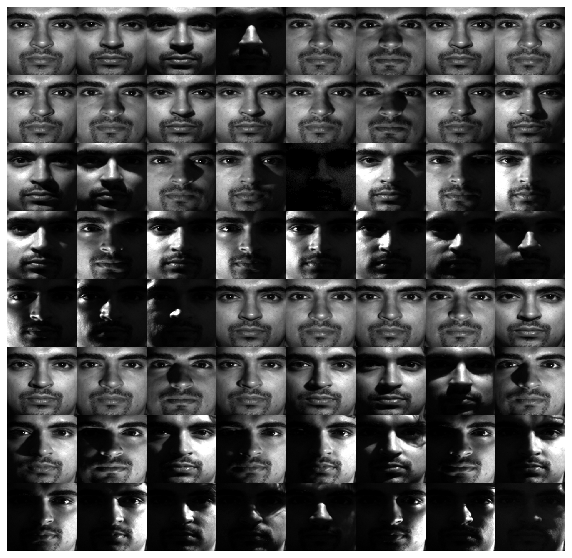

In [9]:
def display_one_participant(p_id):
    '''
    Input: 
        p_id = index of the person to be displayed 
        (remember that you have access to the global variables from the import cell)
    Output: None
    '''
    fig, axes = plt.subplots(nrows=8, ncols=8)
    plt.subplots_adjust(wspace=0, hspace=0)
    axes=axes.flatten()
    # Iterate over each person in the dataset
    axes[0].axis('off')
    index=0
    for i in range(p_id):
        index += nfaces[i]
    axes[0].imshow(np.reshape(faces[:,index],(m_prime,n_prime)).T,cmap='gray',interpolation='nearest', aspect='auto')
    axes[0].axis('off')    
    for i in range(nfaces[p_id]-1):
        # Select one image from the current person's set of images
        index +=1
        # Plot the image in the appropriate subplot
        img = axes[i+1].imshow(np.reshape(faces[:,index],(m_prime,n_prime)).T,interpolation='nearest', aspect='auto')
        img.set_cmap('gray')
        axes[i+1].axis('off')
        
        
    
        

    # Display the matrix of images
    plt.show()
            
display_one_participant(8)
    

Here is an example of an output of "display_one_participant" for person_id (p_id) = 8
![example one participant image](oneparticipant.png "person 8")

In [10]:
def average_face():
    '''
    Input: None (remember that you have access to the global variables from the import cell)
    Output: np-array - (n'*m'x 1) flattened image of the average face from the training participants
    
    We take the average of the training set to find the average face. Display the average face as well return it
    '''
    #create a new variavle to hold mean
    x=[0 for i in range(len(faces[:,1]))]
    #add every vector together
    for i in range(len(x)):
        for j in range(len(trainingFaces[1])):
            x[i] += trainingFaces[:,j][i]
    #divide by length
    for i in range(len(x)):
        x[i]=x[i]/len(x)
    #return mean
    return x
avg_face = average_face() #once this cell is run, you can access "avg_face" from any cell as a global variable


In [11]:
def mean_center_SVD(avg_face):
    '''
    Input:
        avg_face = np array (n*m by 1) which is the result from "average_face()"
        (remember that you have access to the global variables from the import cell)
        
    Output:
        np-array: U from the SVD, which is a (n x r) matrix
        
    1. Take the SVD of the mean-centered training data
    2. Display the eigenface at index 0
    3. Return the matrix U.
    '''
    #     write your code here
    #make a copy of training set
    copy=trainingFaces.copy()
    #standardize each vector
    for i in range(len(copy)):
        for j in range(len(trainingFaces[1])):
            copy[:,j][i] -= avg_face[i]
    #compute svd
    U, S, V=np.linalg.svd(copy,full_matrices=0)
    return U

U = mean_center_SVD(avg_face) #once this cell is run, you can call "U" is a global variable from any cell.
                              #Be sure to run "average_face()" first to have access to "avg_face"

In [47]:
def reconstruct(U, p, x, avg_face):
    '''
    Input:
        U = np array (n x r) from "mean_centered_SVD()"
        p = int, representing the first p eigenfaces to use in the reconstruction
        x = np array (n x 1) represents an original image
        avg_face = np array from "average_face()"
        (remember that you have access to the global variables from the import cell)
        
    output:
        x_hat = np array (n x 1) reconstruction of x using the eigenfaces in U
        
    Reconstruct x, x_hat, using the first p columns of U. 
    
    A few notes to remember:
        1. x_hat = Up(Up.T)x, to speed up computation, we recommend first computing alpha = (Up.T)x, and afterwards computing
            Up(alpha). 
        2. Mean center x before reconstruction
        3. Because U and x will both be mean centered, your final step in the reconstruction needs to be "x_hat += avg_face"
    '''
    #make a copy of the image so it doesnt erase original photo
    image=x.copy()
    #standardize the photo
    for i in range (len(x)):
        image[i] -= avg_face[i]
    #create alpha
    alpha=np.dot(U[:, :p].T,image)
    #create final answer that just needs to be destandardized
    answer=np.dot(U[:,:p],alpha)
    #destandardize
    for i in range(len(alpha)):
        answer[i] += avg_face[i]
    return answer

In [74]:
def reconstruct_experiments(photo_index, p_list = [25, 50, 100, 200, 400]):
    '''
    Input:
        photo_index: int between 0 <= photo_index <= cols(testingFaces). represents a specific photo from testingFaces
        p_list: List, represents the values of p to be used in the reconstruction of photo at index photo_index
        
    Output:
        None
    
    Make sure this function does the following:
        1. Displays the original image to be reconstructed
        2. Displays the reconstruction of the original image for each p in p_list
        3. All reconstructions are labelled clearly as to the value of p that created that reconstructed image
    '''
    # get the original image
    fig, axes = plt.subplots(nrows=3, ncols=2)
    
    axes = axes.flatten()

    # get the original image
    x = testingFaces[:, photo_index]

    # display the original image
    axes[0].imshow(np.reshape(x, (m_prime, n_prime)).T, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Iterate over each p in p_list
    for i, p in enumerate(p_list):
        # reconstruct the image using the given p
        x_recon = reconstruct(U, p, x, avg_face)

        # display the reconstructed image
        axes[i+1].imshow(np.reshape(x_recon, (m_prime, n_prime)).T, cmap='gray')
        axes[i+1].set_title("SVD Image (p={})".format(p))
        axes[i+1].axis("off")

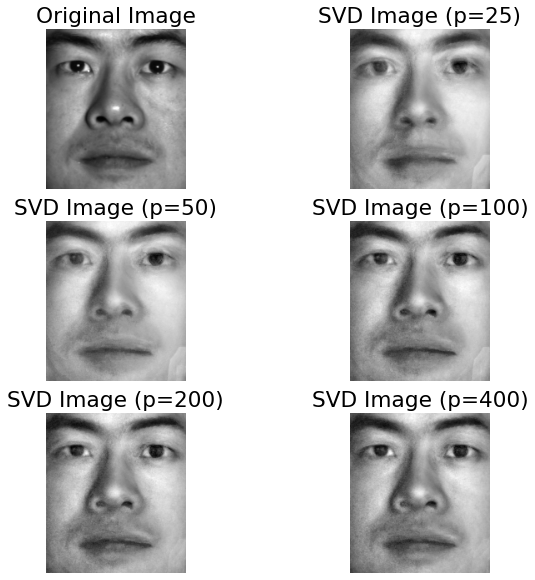

In [75]:
reconstruct_experiments(99)

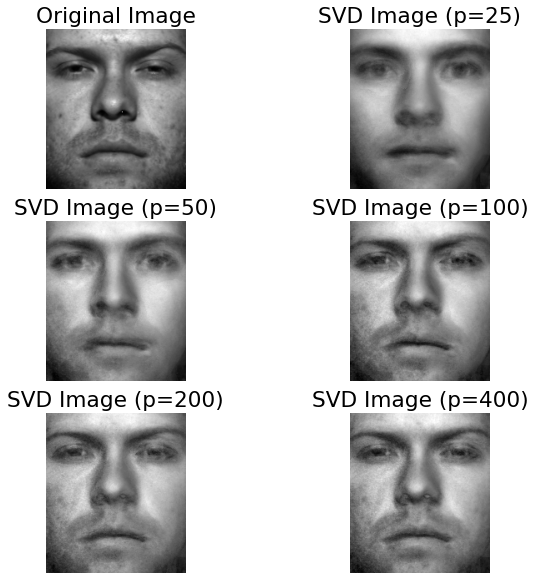

In [76]:
reconstruct_experiments(1)

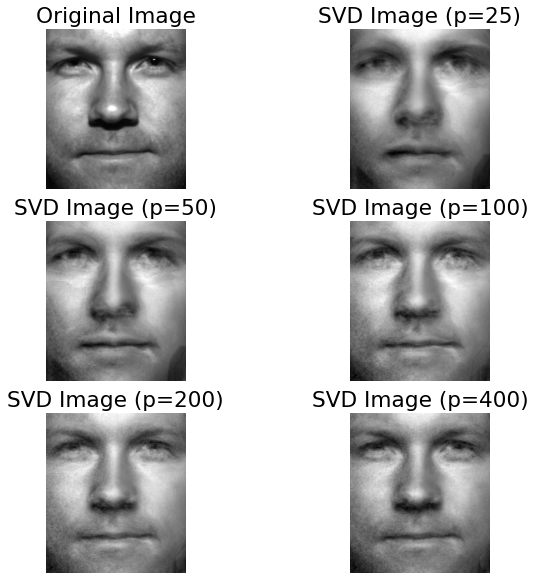

In [80]:
reconstruct_experiments(127)